In [1]:
require("/home/amit/Downloads/SemVII/QuDynamics.jl/src/QuDynamics.jl")

 in depwarn at deprecated.jl:73
 [inlined code] from deprecated.jl:694
 in require at no file:0
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/amit/.julia/v0.4/IJulia/src/execute_request.jl:182
 in eventloop at /home/amit/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
while loading In[1], in expression starting on line 1


In [2]:
using PyPlot

In [3]:
using QuDynamics
using QuBase

In [4]:
immutable QuLindbladMasterEqTD <: QuEquation{1}
end

In [5]:
function fn(H1, H2, t)
    H1 + 9*H2*expm(-(t/5)^2)
end

fn (generic function with 1 method)

In [6]:
N = 2 # Set where to truncate Fock state for cavity
ustate = statevec(1, FiniteBasis(3))
excited = statevec(2, FiniteBasis(3))
ground = statevec(3, FiniteBasis(3))
sigma_ge = tensor(QuArray(eye(N)), ground * excited')  # |g><e|
sigma_ue = tensor(QuArray(eye(N)), ustate * excited')  # |u><e|
a = tensor(lowerop(N), QuArray(eye(3)))
g = 5
H0 = -g * (sigma_ge' * a + a' * sigma_ge)  # time-independent term
H1 = sigma_ue' + sigma_ue

6x6 QuMatrix in QuBase.FiniteBasis{QuBase.Orthonormal}:
...coefficients: Array{Float64,2}
[0.0 1.0 0.0 0.0 0.0 0.0
 1.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 1.0 0.0
 0.0 0.0 0.0 1.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0]

In [7]:
kappa = 1.5 # Cavity decay rate
gamma = 6  # Atomic decay rate
c_ops = Array(QuBase.QuArray, 3)
c_ops[1] = sqrt(kappa) * a
c_ops[2] = sqrt(5*gamma/9) * sigma_ue
c_ops[3] = sqrt(4*gamma/9) * sigma_ge
# c_ops = [sqrt(kappa) * a, sqrt(5*gamma/9) * sigma_ue, sqrt(4*gamma/9) * sigma_ge]
c_ops

3-element Array{QuBase.QuArray{B<:QuBase.AbstractBasis{S<:QuBase.AbstractStructure},T,N,A},1}:
 6x6 QuMatrix in QuBase.FiniteBasis{QuBase.Orthonormal}:
...coefficients: SparseMatrixCSC{Float64,Int64}

	[1, 4]  =  1.22474
	[2, 5]  =  1.22474
	[3, 6]  =  1.22474                                                                                                          
 6x6 QuMatrix in QuBase.FiniteBasis{QuBase.Orthonormal}:
...coefficients: Array{Float64,2}
[0.0 1.8257418583505538 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 1.8257418583505538 0.0
 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0]
 6x6 QuMatrix in QuBase.FiniteBasis{QuBase.Orthonormal}:
...coefficients: Array{Float64,2}
[0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 1.632993161855452 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 1.632993161855452 0.0]  

In [8]:
function QuDynamics.operator(qu_eq::QuLindbladMasterEqTD, t)
    QuDynamics.lindblad_op(fn(H0, H1, t),c_ops)
end

operator (generic function with 9 methods)

In [9]:
psi0 = tensor(statevec(1, FiniteBasis(N)), ustate)

6-element QuVector in QuBase.FiniteBasis{QuBase.Orthonormal}:
...coefficients: Array{Float64,1}
[1.0,0.0,0.0,0.0,0.0,0.0]

In [10]:
tlist = linspace(-15,15,100)

linspace(-15.0,15.0,100)

In [11]:
quprop = QuPropagator(QuLindbladMasterEqTD(), psi0*psi0', tlist, QuExpmV())

QuDynamics.QuStateEvolution{QuDynamics.QuExpmV,QuBase.QuArray{QuBase.FiniteBasis{QuBase.Orthonormal},Float64,2,Array{Float64,2}},QuLindbladMasterEqTD}(QuLindbladMasterEqTD(),6x6 QuMatrix in QuBase.FiniteBasis{QuBase.Orthonormal}:
...coefficients: Array{Float64,2}
[1.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0],linspace(-15.0,15.0,100),QuDynamics.QuExpmV(Dict{Symbol,Any}()))

In [12]:
for (t, rho) in quprop
    println(t, rho)
end

-14.6969696969696976x6 QuMatrix in QuBase.FiniteBasis{QuBase.Orthonormal}:
...coefficients: Array{Complex{Float64},2}
Complex{Float64}[0.9999998802137748 + 0.0im 0.0 + 0.00021626448510784105im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0002130743566675159 + 0.0im
                 0.0 - 0.00021626448510784102im 4.677033350249888e-8 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 - 4.60804220917716e-8im
                 0.0 + 0.0im 0.0 + 0.0im 2.7615203840032066e-8 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im
                 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im
                 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im
                 0.0002130743566675159 + 0.0im 0.0 + 4.60804220917716e-8im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 4.540068776956918e-8 + 0.0im]
-14.3939393939393946x6 QuMatrix in QuBase.FiniteBasis{QuBase.Orthonormal}:
...coefficients: Array{Complex{Float64},2}
Complex{Float64}[0.9999996268216432 + 0.0im 0.0 + 0.0001

In [13]:
q = Array[]
push!(q, coeffs(vec(psi0*psi0')))
for (t, psi) in quprop
    push!(q, coeffs(vec(psi)))
end
q

100-element Array{Array{T,N},1}:
 [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]                                                                                                                                                                                                     
 Complex{Float64}[1.0+0.0im,0.0-0.000216264im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.000213074+0.0im,0.0+0.000216264im,4.67703e-8+0.0im,0.0+0.0im,0.0+0.0im  …  0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.000213074+0.0im,0.0-4.60804e-8im,0.0+0.0im,0.0+0.0im,0.0+0.0im,4.54007e-8+0.0im]        
 Complex{Float64}[1.0+0.0im,0.0-0.000167749im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.000467491+0.0im,0.0+0.000167749im,2.81398e-8+0.0im,0.0+0.0im,0.0+0.0im  …  0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.000467491+0.0im,0.0-7.84211e-8im,0.0+0.0im,0.0+0.0im,0.0+0.0im,2.18547e-7+0.0im]        
 Complex{Float64}[0.999999+0.0im,0.0-0.000151087im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.000611158+0.0im,0.0+0.000151087i

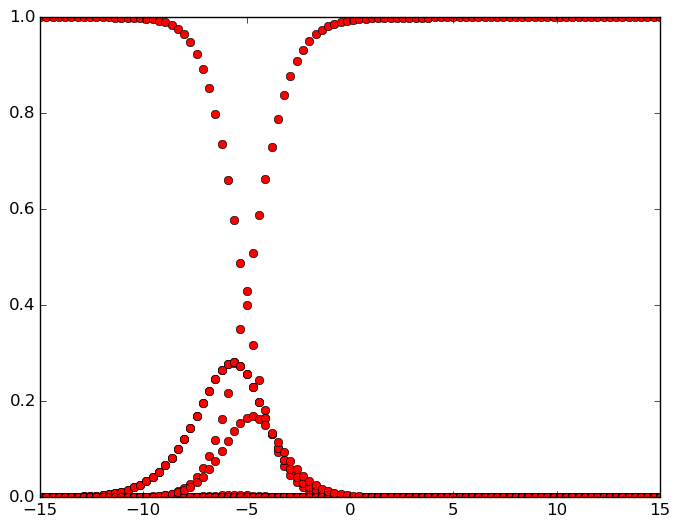

In [14]:
for i in 1:length(q)
    for j in 1:length(q[i])
    plot(tlist[i], real(q[i][j]), "ro")
    # println(tlist[i], real(q[i]))
    end
end

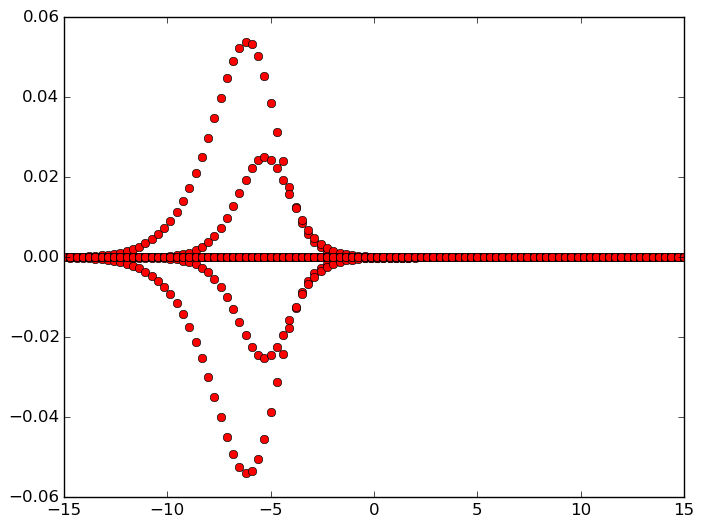

In [15]:
for i in 1:length(q)
    for j in 1:length(q[i])
        plot(tlist[i], imag(q[i][j]), "ro")
    # println(tlist[i], real(q[i]))
    end
end